<a href="https://colab.research.google.com/github/lawakobadu/Kelompok-1-APM/blob/main/Bernoulli_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install jcopml

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [7]:
data = pd.read_csv('seattleWeather_1948-2017.csv')
data

,PRCP,TMAX,TMIN,RAIN
0,0.47,51,42,1
1,0.59,45,36,1
2,0.42,45,35,1
3,0.31,45,34,1
4,0.17,45,32,1
...,...,...,...,...
25546,0.00,49,34,0
25547,0.00,49,29,0
25548,0.00,46,32,0
25549,0.00,48,34,0


In [54]:
x = data.drop(columns="RAIN")
y = data.RAIN

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20440, 3), (5111, 3), (20440,), (5111,))

In [55]:
preprocessor = ColumnTransformer([
      ('numeric', num_pipe(), ["PRCP","TMAX","TMIN"]),
])

In [56]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
      ('prep', preprocessor),
      ('algo', GaussianNB())
])

In [57]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['PRCP', 'TMAX', 'TMIN'])])),
                ('algo', GaussianNB())])

In [58]:
pipeline.score(x_train,y_train)

0.9999021526418786

In [59]:
pipeline.score(x_test,y_test)

0.9998043435726863

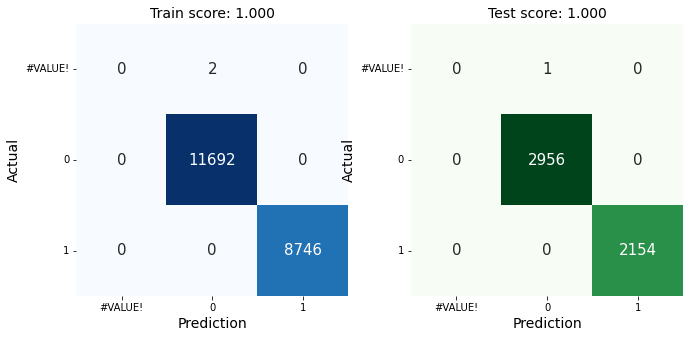

In [68]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(x_train,y_train,x_test,y_test,pipeline)